In [1]:
import omegaconf
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ultk.effcomm.rate_distortion import ib_encoder_to_point

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from game.game import Game

from tqdm import tqdm


In [2]:
# Fix one param config

parent = Path("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=1e-08/dist=squared_dist/meaning_certainty=0.5/dynamics=imprecise_conditional_imitation/ii=0.5/discr_need=8.531678524172797e-06/population_init=None/population_size=None/max_its=100000.0/num_runs=1/seed=0/")

config = omegaconf.OmegaConf.load(parent / ".hydra/config.yaml")
g = Game.from_hydra(config)

In [3]:
betas = np.load("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=1e-08/dist=squared_dist/meaning_certainty=0.5/betas.npy")

optimal_encoders = np.load("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=1e-08/dist=squared_dist/meaning_certainty=0.5/optimal_encoders.npy")

curve_data = pd.read_csv("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=1e-08/dist=squared_dist/meaning_certainty=0.5/curve_points.csv")

emergent_encoders = np.load("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=1e-08/dist=squared_dist/meaning_certainty=0.5/dynamics=imprecise_conditional_imitation/ii=0.5/discr_need=8.531678524172797e-06/population_init=None/population_size=None/max_its=100000.0/num_runs=1/seed=0/trajectory_encoders.npz")["run_0"]



In [4]:
curve_points = curve_data[["complexity", "accuracy"]].values

In [6]:
# todo: filter beta to approapriate values
curve_points = curve_points[1:]
betas = betas[1:]

In [5]:
# Measure efficiency loss 1/beta (F_emergent - F_optimal) to any F_optimal
# F_[q] = em_complexity - em_acc
# eps = 1/beta * ( F_[q] - F_[q*] )
F_opt = curve_points[:,0] - betas * curve_points[:,1]

for em in tqdm(emergent_encoders, desc="looping over encoders"):
    comp, acc, _ = ib_encoder_to_point(g.prior, g.meaning_dists, em)
    F_em = comp - betas * acc

    # Do we have F_[q] >= F_[q*] for all q?
    F_em_deviation = F_em - F_opt
    min_ind = np.argmin(F_em_deviation)

    beta_em = betas[min_ind]
    epsilon_em = np.min(F_em_deviation) / beta_em
    fitted_opt = optimal_encoders[min_ind]

    
    print(epsilon_em)

    if epsilon_em < 0:
        print(epsilon_em)
        assert False


looping over encoders:   5%|▍         | 9/181 [00:00<00:03, 43.35it/s]

0.2095653735535841
0.009487346180466313
0.003771730122200384
0.0021307623659556152
0.0014086698608092062
0.001018790170451542
0.0007812937648763671
0.0006244498429508765
0.00051463379532377
0.0004342365038288611


looping over encoders:   8%|▊         | 14/181 [00:00<00:04, 41.30it/s]

0.00037326497392873643
0.0003256887785493125
0.0002876990753067487
0.00025671585227411383
0.00023105859938138363
0.00020951174327099288
0.00019119684899386694
0.00017546464739874723


looping over encoders:  14%|█▍        | 25/181 [00:00<00:03, 45.34it/s]

0.0001618256795907
0.00014990449334342898
0.00013940862960285584
0.00013010714578022244
0.00012181543816893297
0.00011438431766896128
0.00010769201535307307
0.0001016382437947149
9.613972530576993e-05
9.112678267092023e-05
8.654071067679174e-05
8.233172863346061e-05


looping over encoders:  20%|██        | 37/181 [00:00<00:03, 47.29it/s]

7.845737010565332e-05
7.488120573237237e-05
7.157182164002975e-05
6.850199643686028e-05
6.564803338604556e-05
6.298921491631068e-05
6.050735445662871e-05
5.8186425889743104e-05
5.601225569126819e-05


looping over encoders:  27%|██▋       | 48/181 [00:01<00:02, 50.56it/s]

5.3972265713196526e-05
5.205525729893173e-05
5.025122914259996e-05
4.85512231537356e-05
4.6947193155983303e-05
4.543189292357972e-05
4.39987801070493e-05
4.264193362441121e-05
4.13559822781996e-05
4.013604300276637e-05
3.897766713389897e-05
3.787679364721832e-05


looping over encoders:  34%|███▎      | 61/181 [00:01<00:02, 55.51it/s]

3.682970815954388e-05
3.583300715244347e-05
3.4883566393180334e-05
3.397851315270095e-05
3.3115201690080934e-05
3.229119147577302e-05
3.150422792225382e-05
3.0752225196618385e-05
3.0033250952216952e-05
2.9345512588831818e-05
2.86873450964172e-05
2.805720001326027e-05


looping over encoders:  40%|████      | 73/181 [00:01<00:01, 57.36it/s]

2.7453635565684255e-05
2.68753078146033e-05
2.6320962609307483e-05
2.578942838497705e-05
2.5279609573833365e-05
2.4790480683960922e-05
2.4321080939897206e-05
2.3870509327561413e-05
2.3437920161178518e-05
2.3022519023591193e-05
2.2623559028806624e-05


looping over encoders:  44%|████▎     | 79/181 [00:01<00:02, 48.89it/s]

2.224033744628552e-05
2.1872192580718015e-05
2.1518500905868253e-05
2.117867447758216e-05
2.0852158509066464e-05
2.05384291778588e-05
2.023699156886332e-05
1.994737776958788e-05
1.966914521545019e-05


looping over encoders:  50%|█████     | 91/181 [00:01<00:01, 50.36it/s]

1.9401875027800417e-05
1.9145170524152972e-05
1.8898655879515552e-05
1.8661974844705098e-05
1.8434789557381823e-05
1.8216779436979894e-05
1.80076401973552e-05
1.7807082893813644e-05
1.7614832985015052e-05
1.7430629608767632e-05
1.7254224727247764e-05
1.7085382473757262e-05


looping over encoders:  57%|█████▋    | 103/181 [00:02<00:01, 52.15it/s]

1.6923878432990936e-05
1.6769499059028872e-05
1.6622041083747957e-05
1.6481310947619707e-05
1.6347124324053142e-05
1.5577277610185945e-05
1.5070658866000969e-05
1.469798527718243e-05
1.4603412898860255e-05
1.4784512566267544e-05
1.5283420274142913e-05
1.6073220419097928e-05


looping over encoders:  64%|██████▎   | 115/181 [00:02<00:01, 49.31it/s]

1.7229533993032556e-05
1.8854954006546425e-05
2.0718688591480355e-05
2.298180559445124e-05
2.451460713922829e-05
2.5831485191839153e-05
2.7217442217266675e-05
2.857998078271895e-05


looping over encoders:  67%|██████▋   | 121/181 [00:02<00:01, 33.15it/s]

3.0166415720006995e-05
3.1917809762217294e-05
3.397680882328411e-05
3.6459120066078246e-05
3.917693861022631e-05
4.241390599836498e-05


looping over encoders:  73%|███████▎  | 133/181 [00:02<00:01, 42.02it/s]

4.5802239309688615e-05
4.7896050118676526e-05
4.760839286066148e-05
4.353732430726003e-05
3.669684976281887e-05
2.9566170719474762e-05
2.3776285233654347e-05
1.968154533807152e-05
1.683381929789186e-05
1.479534994483352e-05
1.3288506427559541e-05
1.2011407903027465e-05


looping over encoders:  77%|███████▋  | 140/181 [00:02<00:00, 46.88it/s]

1.0920153559124767e-05
9.915975901392897e-06
8.973646411876651e-06
8.10745847758572e-06
7.312614385052223e-06
6.598477624306829e-06
5.919301521532417e-06
5.225260044805063e-06
4.596155398466823e-06
4.020758831963425e-06
3.5015546155783146e-06
2.9906341077817093e-06


looping over encoders:  84%|████████▍ | 152/181 [00:03<00:00, 47.21it/s]

2.4682553579960666e-06
1.990140771182528e-06
1.5527159365460446e-06
1.1548207098621607e-06
7.900543062979678e-07
3.924712931095158e-07
1.3925731697027744e-08
-3.358101356069248e-07
-3.358101356069248e-07


AssertionError: 

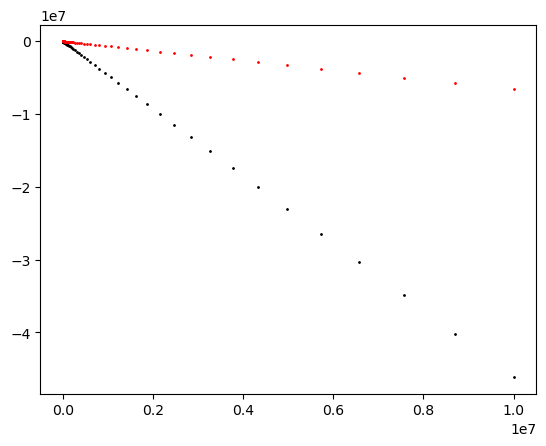

In [6]:
plt.scatter(betas, F_opt, color="black", s=1)
plt.scatter(betas, F_em, color="red", s=1)
plt.show()

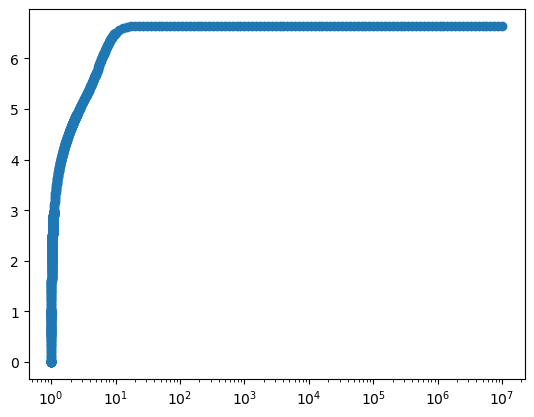

In [8]:
plt.scatter(betas, curve_points[:,0])
plt.xscale('log')
plt.show()

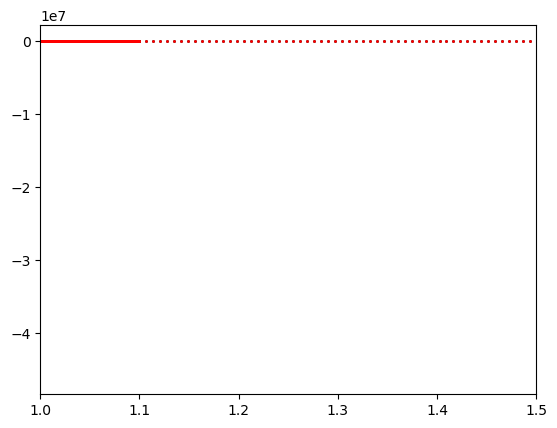

In [16]:
plt.scatter(betas, F_opt, color="black", s=1)
plt.scatter(betas, F_em, color="red", s=1)
# plt.xlim(1.,1.5)
# plt.ylim(-10, 5)
plt.show()

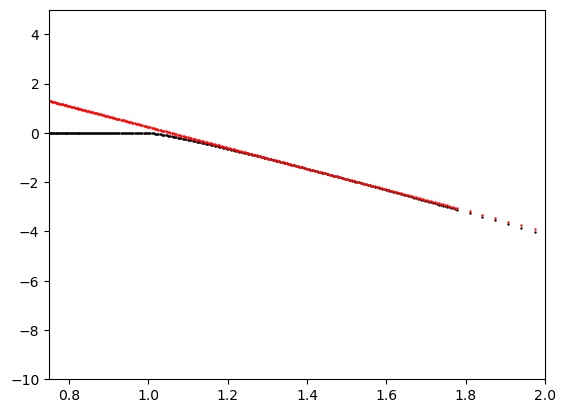

In [17]:
plt.scatter(betas, F_opt, color="black", s=0.5)
plt.scatter(betas, F_em, color="red", s=0.5)
plt.xlim(0.75,2.)
plt.ylim(-10, 5)
plt.show()

In [20]:
assert np.count_nonzero((F_em - F_opt) / betas < 0) == 0

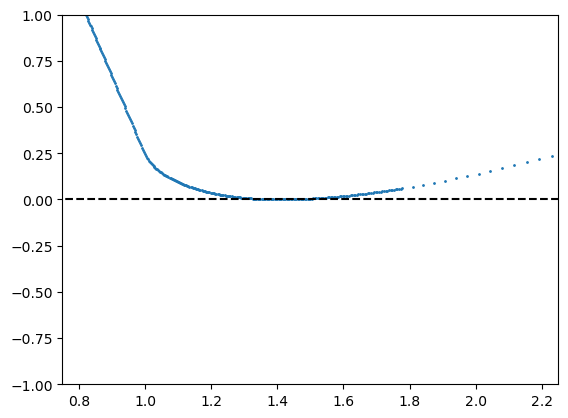

In [12]:
plt.scatter(betas, F_em - F_opt, s=1)
plt.hlines(0, 0, 4, color="black", linestyles='dashed')
plt.xlim(0.75,2.25)
plt.ylim(-1, 1)
plt.show()

Ruling out that the source is numerical instability in the region $\beta = [1.0,2.0]$

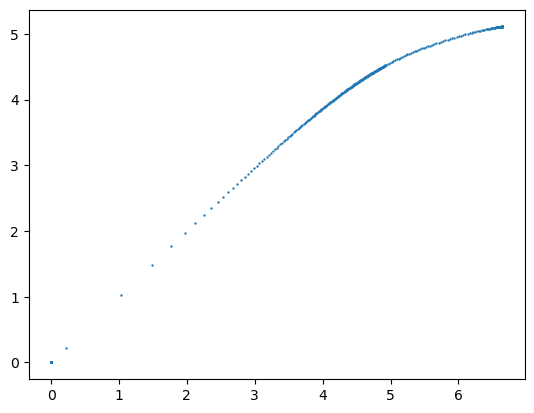

In [13]:
plt.scatter(*curve_points.T, s=0.5)

Text(0.5, 0, '$\\log_{10} \\beta$')

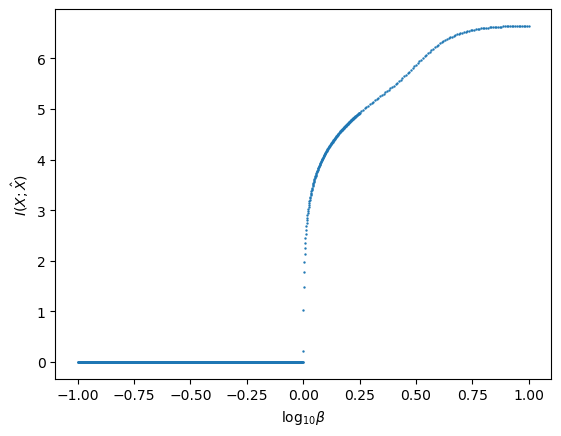

In [14]:
# what are the complexity values for beta 0.8 to 2.2?
# plt.scatter(betas[:1800], curve_points[:,1][:1800], s=0.5,)
plt.scatter(np.log10(betas), curve_points[:,0], s=0.5)
plt.ylabel(r"$I(X;\hat{X})$")
plt.xlabel(r"$\log_{10} \beta$")

In [15]:
# Why are the encoders before beta=1 not 0 complexity
betas[1600]
curve_points[1600,0]
plt.imshow(optimal_encoders[1000])

IndexError: index 1600 is out of bounds for axis 0 with size 1098

In [ ]:
# WHAT ARE THEY

curve_points[1500]

array([3.49360857, 3.42710375])

(0.8, 2.2)

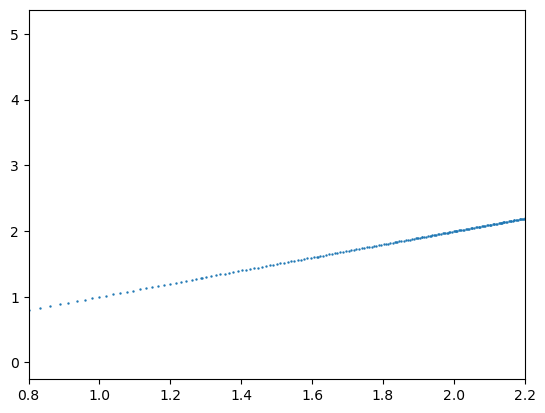

In [ ]:
plt.scatter(*curve_points.T, s=0.5)
plt.xlim(0.8, 2.2)

(0.5, 2.0)

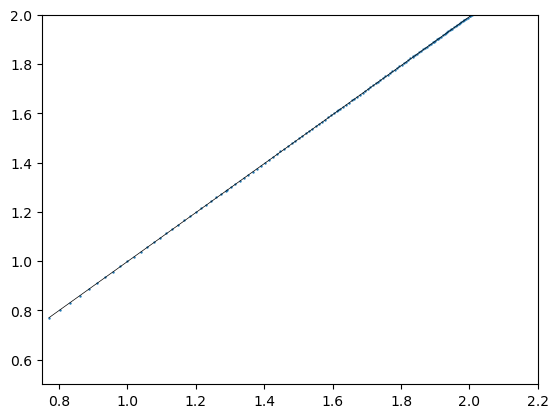

In [ ]:
# Idea draw a line between the y value at 0.8 and the y value at 2.0, and check if the blue line is below it.
import numpy as np
np.set_printoptions(suppress=True)
index1 = 620
index2 = 800
xy1 = curve_points[index1]
xy2 = curve_points[index2]
plt.scatter(*curve_points.T, s=0.5)
plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]], color="black", linewidth=0.5)
plt.xlim(0.75, 2.2)
plt.ylim(0.5,2)

Ruling out that the source of trouble is from an encoder that doesn't sum to 1.0

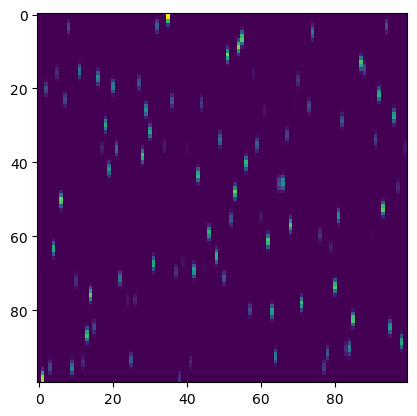

In [ ]:
plt.imshow(em)
plt.show()

In [ ]:
em.sum(1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
comp, acc

(4.476589070012617, -36.349141366637504)